# Python for Big Data ( Life Sciences Research )
( Python is a great tool for bioinformatics )

## Goals:
- Understand Python ( scikit-learn, PyTorch )
- Machine Learning and Deep Learning Applications in Bioinformatics


&nbsp;
## Learn Python with basic Bioinformatics:

### 1. Genome:
- A genome is the collection of an organism's hereditary information as encoded in its DNA, and it is consists of a combination of A, C, G, and T.
- A genome is simply the sum total of an organism's DNA.

Whole Genome                   | Image from Sequencing Machine        
:-----------------------------:|:------------------------------
![](NUST_image/genome-2.jpg)   |![](NUST_image/genome-1.jpeg)

In [1]:
import random

genome = ''.join([random.choice('ACGT') for _ in range(300)])

In [2]:
genome

'CTCTTGTCAGGAGGTATGGCCTGCTTTCCTGGAAATCATTAATAAGCCGAATTCTAACAAAGATACGAATAACCAATACCTTGCGACCTCACAATGGCCGGTTACCGGACACCCTCCAAAGAGACGGCTGACTCCCTAGCGTCTCCATGCTCTTGGTACAGTCGACTAAGTTGGGCCGCCATATTACAGCAAGGATAGCGAAATGTTTAGCTGCTGCATAATTGGTATCCGCATGACTCAAAGTGATCCCTAACCCTGCGTGCGAGGCTTGGGTGAAATTCAGGTCTATATATCTTTAAA'

**Note:** The human genome is made up of over 3 billion base pairs (bps). 

### 2. Gene:
( A gene is a segment of a genome. )

Gene-1                         | Gene-2
:-----------------------------:|:------------------------------
![](NUST_image/gene-3.jpg)     |![](NUST_image/gene-4.png)

In [6]:
gene = genome[10:50]
gene


'GAGGTATGGCCTGCTTTCCTGGAAATCATTAATAAGCCGA'

### 3.  Counting DNA Nucleotides [ [link](http://rosalind.info/problems/dna/) ]:

In [7]:
def countingGenomeContents(dna):
#     return dna.count('A'), dna.count('C'), dna.count('G'), dna.count('T')
    
    C = {'A':0, 'C':0, 'G':0, 'T':0}
    for i in dna:
        C[i] += 1
    return C


countingGenomeContents(gene)
# Adenine (A), Cytosine (C), Guanine (G), and Thymine (T)


{'A': 11, 'C': 8, 'G': 10, 'T': 11}

### 4. GC Contents:

![](NUST_image/gcContent.png)

In [8]:
def gcContents(dna):
    
    C=0
    for base in dna:
        if (base is 'C') or (base is 'G'):
            C+=1
            # print(base)
    return (C/len(dna)) * 100.0

#     A = dna.count('A'); C = dna.count('C'); G = dna.count('G'); T = dna.count('T')
#     return ((G+C) / (A+C+G+T))*100.0


print('GC-Content is {}%'.format(gcContents(genome)))


GC-Content is 47.0%


**Note-1:** Human GC-Content is approximate 57.0%.

**Note-2:** GC-Content < 
50.0% (Virus, Bacteria, Fungi etc.)

### 5. Skew Diagram [ [link](https://biologywedscomputer.wordpress.com/tag/genes/) ]:

![](NUST_image/skew.png)
###### Rules:
- No change (0) for A and T
- Decrease one (-1) for C
- Increase one (+1) for G


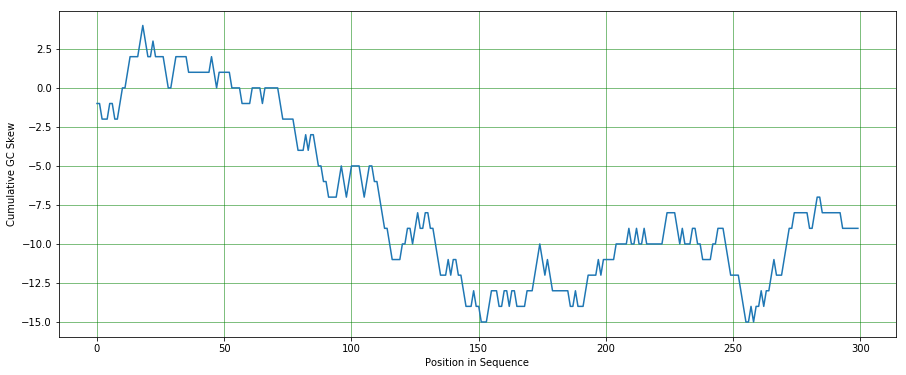

Value: -9, Maximum: 4, Minimum:-15


In [9]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def skewDiagram(x):
    value = 0
    valueMaxMin = []
    for base in x:
        if base == 'C':
            value -= 1
            valueMaxMin.append(value)

        else:
            if base == 'G':
                value += 1
                valueMaxMin.append(value)

            else:
                value += 0
                valueMaxMin.append(value)

    plt.plot(range(0, len(valueMaxMin)), np.array(valueMaxMin))
    plt.grid(which='major', linestyle='-', linewidth='0.50', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.75', color='black')
    plt.xlabel('Position in Sequence')
    plt.ylabel('Cumulative GC Skew')
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(15.0, 6.0)
    plt.show()
    
    return value, max(valueMaxMin), min(valueMaxMin)

v = skewDiagram(genome)
print('Value: {}, Maximum: {}, Minimum:{}'.format(v[0], v[1], v[2]))


### 6. Complement of DNA

![](NUST_image/dna-4.jpg)
![](NUST_image/DNA-2.png)
![](NUST_image/coding_template_strands.png)

##### Rules:

- A <--> T
- C <--> G

In [10]:
def complementDNA(codingStrand):
    c = {'A':'T', 'T':'A', 'C':'G', 'G':'C'}

    templateStrand = ''
    for base in codingStrand:
        templateStrand += c[base]
    return templateStrand

complementDNA('CTGGACTGTA')


'GACCTGACAT'

### 7. Reverse Complement of DNA

![](NUST_image/ReverseComplementaion.PNG)

In [11]:
def reverseComplementDNA(codingStrand):
    c = {'A':'T', 'T':'A', 'C':'G', 'G':'C'}

    templateStrand = ''
    for base in codingStrand:
        templateStrand = c[base] + templateStrand
    return templateStrand

reverseComplementDNA('ATGCCCGGGTAA')


'TTACCCGGGCAT'

### 8. DNA to RNA Conversion:

![](NUST_image/trascription-dna-to-rna.png)
![](NUST_image/rna.png)

##### Rules:
- Convert T to U from coding strand (+1) 

In [13]:
def dnaToRNA(dna):
    
    rna = ''
    for base in dna:
        if base is 'T':
           rna += 'U'
        else:
            rna += base

    return rna

#     return dna.replace('T', 'U')

dnaToRNA('ATGGCCTGGACTTCA')


'AUGGCCUGGACUUCA'

### 9. Hamming Distance

The number of mismatches between the two strings (same length) is called the Hamming distance.

![](NUST_image/Hamming_distance.png)

&nbsp;
<center>The red marker denotes mismatch position. So, the hamming distance of given strings is 7.</center>

In [14]:
def hammingDistance(dna1, dna2):
    
    C=0
    for base1, base2 in zip(dna1, dna2):
        if base1 is not base2: C+=1
    return C

#     return len([(x,y) for x,y in zip(dna1,dna2) if x is not y])

dna1 = 'GAGCCTACTAACGGGAT'
dna2 = 'CATCGTAATGACGGCCT'

print('The hamming distance between strings is {}.'.format(hammingDistance(dna1, dna2)))


The hamming distance between strings is 7.


### 10. k-mers:

<img src="NUST_image/kmers-2.png" alt="drawing" width="800"/>

##### Rules:
- Number of k-mers = length of sequence - k + 1 = ( 17 - 7 + 1 = 11 )

In [15]:
def kmers(dna, k):
    v = []
    for i in range(len(dna) - k + 1):
        v.append(dna[i:i + k])
    return v

# ATAGACCCTAGACGAT
v = kmers('ATGGAAGTCGCGGAATC', 7) #7-mers

for space, i in enumerate(v):
    print(' '*space + i)


ATGGAAG
 TGGAAGT
  GGAAGTC
   GAAGTCG
    AAGTCGC
     AGTCGCG
      GTCGCGG
       TCGCGGA
        CGCGGAA
         GCGGAAT
          CGGAATC


#### 10.1 Find all possible kmers from given k:

<img src="NUST_image/kmers-5.jpg" alt="drawing" width="600"/>

( Using the cartesian product rule! )

In [16]:
from itertools import permutations, product

k = 3
v = product('ACGT', repeat=k)

d = {}
for i in v:
    d[''.join(i)] = 0

ensure = True
for key, _ in d.items():
    if ensure == True:
        print(key, end='')
        ensure = False
        
    else:
        print(', {}'.format(key), end='')


AAA, AAC, AAG, AAT, ACA, ACC, ACG, ACT, AGA, AGC, AGG, AGT, ATA, ATC, ATG, ATT, CAA, CAC, CAG, CAT, CCA, CCC, CCG, CCT, CGA, CGC, CGG, CGT, CTA, CTC, CTG, CTT, GAA, GAC, GAG, GAT, GCA, GCC, GCG, GCT, GGA, GGC, GGG, GGT, GTA, GTC, GTG, GTT, TAA, TAC, TAG, TAT, TCA, TCC, TCG, TCT, TGA, TGC, TGG, TGT, TTA, TTC, TTG, TTT

### 11. De Bruijn Graph Construction
De Bruijn graph for the sequence ATAGACCCTAGACGAT from the 5-spectrum (The sequence TAGAC appears twice in the string and hence has two edges placed between TAGA and AGAC.)

<img src="NUST_image/debruijn.png" alt="drawing" width="500"/>

In [17]:
from collections import defaultdict
d = defaultdict(list)

kmers = kmers('ATAGACCCTAGACGAT', 5)

for kmer in kmers:
    prefix = kmer[:-1]
    suffix = kmer[1:]

    if prefix in d:
        d[prefix].append(suffix)
    else:
        d[prefix].append(suffix)
    
    
    
for key, value in d.items():
    if len(value)>1:
        print('{} -> '.format(key), end='')
        C=True
        for i in value:
            if C==True:
                print('{}'.format(i), end='')
            else:
                print(',{}'.format(i), end='')
            C = False
        print()
    else:
        print('{} -> {}'.format(key, value[0]))
        

ATAG -> TAGA
TAGA -> AGAC,AGAC
AGAC -> GACC,GACG
GACC -> ACCC
ACCC -> CCCT
CCCT -> CCTA
CCTA -> CTAG
CTAG -> TAGA
GACG -> ACGA
ACGA -> CGAT


### 12. Finding Motifs

In [18]:
def motifs(S, k):
    
    d = {}

    for i in range(len(S) - k + 1):
        kmer = S[i:i + k]

        if kmer in d:
            d[kmer] += 1
        else:
            d[kmer] = 1

    return d


motifs = motifs(genome, 4)
motifs


{'CTCT': 2,
 'TCTT': 3,
 'CTTG': 4,
 'TTGT': 1,
 'TGTC': 1,
 'GTCA': 1,
 'TCAG': 2,
 'CAGG': 2,
 'AGGA': 2,
 'GGAG': 1,
 'GAGG': 2,
 'AGGT': 2,
 'GGTA': 3,
 'GTAT': 2,
 'TATG': 1,
 'ATGG': 2,
 'TGGC': 2,
 'GGCC': 3,
 'GCCT': 1,
 'CCTG': 3,
 'CTGC': 4,
 'TGCT': 3,
 'GCTT': 2,
 'CTTT': 2,
 'TTTC': 1,
 'TTCC': 1,
 'TCCT': 1,
 'CTGG': 1,
 'TGGA': 1,
 'GGAA': 1,
 'GAAA': 3,
 'AAAT': 3,
 'AATC': 1,
 'ATCA': 1,
 'TCAT': 1,
 'CATT': 1,
 'ATTA': 2,
 'TTAA': 2,
 'TAAT': 2,
 'AATA': 3,
 'ATAA': 3,
 'TAAG': 2,
 'AAGC': 1,
 'AGCC': 1,
 'GCCG': 3,
 'CCGA': 1,
 'CGAA': 3,
 'GAAT': 2,
 'AATT': 3,
 'ATTC': 2,
 'TTCT': 1,
 'TCTA': 2,
 'CTAA': 3,
 'TAAC': 3,
 'AACA': 1,
 'ACAA': 2,
 'CAAA': 3,
 'AAAG': 3,
 'AAGA': 2,
 'AGAT': 1,
 'GATA': 2,
 'ATAC': 2,
 'TACG': 1,
 'ACGA': 1,
 'AACC': 2,
 'ACCA': 1,
 'CCAA': 2,
 'CAAT': 2,
 'TACC': 2,
 'ACCT': 2,
 'CCTT': 1,
 'TTGC': 1,
 'TGCG': 3,
 'GCGA': 3,
 'CGAC': 2,
 'GACC': 1,
 'CCTC': 2,
 'CTCA': 2,
 'TCAC': 1,
 'CACA': 1,
 'AATG': 2,
 'CCGG': 2,
 'CGGT': 1,
 'GG

#### 12.1 Finding the most frequent kmers from motifs:

In [19]:
motifs = sorted(motifs.items(), key=lambda x:x[1], reverse=True)
motifs[:5]

[('CTTG', 4), ('CTGC', 4), ('CCCT', 4), ('TTGG', 4), ('TCTT', 3)]

### 13. Dataset Formation (FASTA, FASTQ)

#### 13.1 Handling FASTA file

In [19]:
# Following line downloads FASTA file containing the lambda phage reference genome
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2019-03-20 01:40:37--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 52.222.178.220, 52.222.178.45, 52.222.178.55, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|52.222.178.220|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.2’

lambda_virus.fa.2   100%[===================>]  48.12K   112KB/s    in 0.4s    

2019-03-20 01:40:38 (112 KB/s) - ‘lambda_virus.fa.2’ saved [49270/49270]



In [20]:
def readFASTAs(fileName):

    '''
    :param fileName:
    :return: genome sequences
    '''
    with open(fileName, 'r') as file:
        v = []
        genome = ''
        for line in file:
            if line[0] != '>':
                genome += line.strip()
            else:
                v.append(genome.upper())
                genome = ''
        v.append(genome.upper())
        del v[0]
        return v


genome = readFASTAs('lambda_virus.fa')
genome # len = 1


['GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCAT

#### 13.2 Handling FASTQ file

In [21]:
# Download FASTQ file
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2019-03-20 01:40:45--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 52.222.178.55, 52.222.178.190, 52.222.178.220, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|52.222.178.55|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq.3’

SRR835775_1.first10 100%[===================>] 219.52K  82.7KB/s    in 2.7s    

2019-03-20 01:40:49 (82.7 KB/s) - ‘SRR835775_1.first1000.fastq.3’ saved [224786/224786]



In [21]:

def readFASTQ(fileName):
    with open(fileName, 'r') as file:
        S = []
        Q = []

        while True:
            _ = file.readline()
            eachS = file.readline().strip()
            _ = file.readline()
            eachQ = file.readline().strip()
            if len(eachS)==0: break
            S.append(eachS)
            Q.append(eachQ)
        return S, Q
        
S, Q = readFASTQ('SRR835775_1.first1000.fastq')

# len(S) and len(Q) are 1,000

In [22]:
print(S[0])
print(Q[0])

TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################


In [23]:
def phred33ToQ(Q):
    return ord(Q) - 33


def createHistogram(Q):
    # Create a histogram of quality scores
    # H = [0]*len(Q)
    
    H = [0]*50
    for q in Q:
        for phred in q:
            eachQuality = phred33ToQ(phred)
            H[eachQuality] += 1
            
    return H


H = createHistogram(Q)
print(H)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


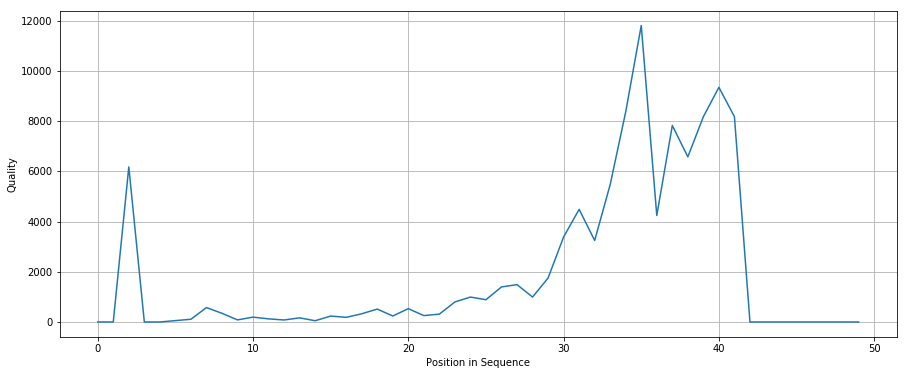

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(H)), H)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15.0, 6.0)
plt.grid()
plt.ylabel('Quality')
plt.xlabel('Position in Sequence')
plt.show()

### 14. Protein

##### mRNA to Protein Conversion
![](NUST_image/drogma-2.png)

&nbsp;
<center>The central drogma of molecular biology.</center>

<img src="NUST_image/RNA_Codon_Table.png" alt="drawing" width="450"/>

&nbsp;
<center>mRNA Codon Table</center>

In [25]:
def mRNAtoProtein(mRNA):
    table = {
        'UUU': 'F', 'CUU': 'L', 'AUU': 'I', 'GUU': 'V',
        'UUC': 'F', 'CUC': 'L', 'AUC': 'I', 'GUC': 'V',
        'UUA': 'L', 'CUA': 'L', 'AUA': 'I', 'GUA': 'V',
        'UUG': 'L', 'CUG': 'L', 'AUG': 'M', 'GUG': 'V',
        'UCU': 'S', 'CCU': 'P', 'ACU': 'T', 'GCU': 'A',
        'UCC': 'S', 'CCC': 'P', 'ACC': 'T', 'GCC': 'A',
        'UCA': 'S', 'CCA': 'P', 'ACA': 'T', 'GCA': 'A',
        'UCG': 'S', 'CCG': 'P', 'ACG': 'T', 'GCG': 'A',
        'UAU': 'Y', 'CAU': 'H', 'AAU': 'N', 'GAU': 'D',
        'UAC': 'Y', 'CAC': 'H', 'AAC': 'N', 'GAC': 'D',
        'UAA': '---', 'CAA': 'Q', 'AAA': 'K', 'GAA': 'E',
        'UAG': '---', 'CAG': 'Q', 'AAG': 'K', 'GAG': 'E',
        'UGU': 'C', 'CGU': 'R', 'AGU': 'S', 'GGU': 'G',
        'UGC': 'C', 'CGC': 'R', 'AGC': 'S', 'GGC': 'G',
        'UGA': '---', 'CGA': 'R', 'AGA': 'R', 'GGA': 'G',
        'UGG': 'W', 'CGG': 'R', 'AGG': 'R', 'GGG': 'G'
    }


    protein = ''
    i=0
    while i< len(mRNA):
        protein += table[mRNA[i:i+3]]
        i += 3

    return protein


mRNAtoProtein('AUGCACCUCAGCCUUUGGCGGAUGACCCUGCAAACUGAAAUUCCGGUACAGAACCCU')

'MHLSLWRMTLQTEIPVQNP'

&nbsp;
### [ Any question about basic Bioinformatics? ]